In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#Step 1: Load the Dataset

In [23]:
df = pd.read_csv("database_IND.csv")

#Step 2: Explore the Dataset

In [24]:

print(df.info())

#summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [25]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#Step 3: Handle Missing Data

In [26]:
# Drop rows with missing latitude and longitude
df = df.dropna(subset=['latitude', 'longitude'])

In [27]:
# Fill missing values in other fuel columns with "Not Available"
df['other_fuel1'] = df['other_fuel1'].fillna("Not Available")
df['other_fuel2'] = df['other_fuel2'].fillna("Not Available")
df['other_fuel3'] = df['other_fuel3'].fillna("Not Available")

<ipython-input-27-3692d8909d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_fuel1'] = df['other_fuel1'].fillna("Not Available")
<ipython-input-27-3692d8909d5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_fuel2'] = df['other_fuel2'].fillna("Not Available")
<ipython-input-27-3692d8909d5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [28]:
# Fill missing values in commissioning year with the median year
median_year = df['commissioning_year'].median()
df['commissioning_year'] = df['commissioning_year'].fillna(median_year)

# Fill missing values in owner column with "Unknown"
df['owner'] = df['owner'].fillna("Unknown")

<ipython-input-28-9e512646222d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['commissioning_year'] = df['commissioning_year'].fillna(median_year)
<ipython-input-28-9e512646222d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].fillna("Unknown")


In [29]:
# Fill missing values in geolocation source with the most frequent source
most_frequent_source = df['geolocation_source'].mode()[0]
df['geolocation_source'] = df['geolocation_source'].fillna(most_frequent_source)

# Fill missing values in year of capacity data with the most recent year
most_recent_year = df['year_of_capacity_data'].max()
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(most_recent_year)

# Fill missing values in estimated generation with the median
median_estimated_generation = df['estimated_generation_gwh'].median()
df['estimated_generation_gwh'] = df['estimated_generation_gwh'].fillna(median_estimated_generation)

<ipython-input-29-464a4e4905bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_source'] = df['geolocation_source'].fillna(most_frequent_source)
<ipython-input-29-464a4e4905bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(most_recent_year)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-29-464

In [30]:
# Drop unnecessary columns
df = df.drop(['generation_gwh_2013', 'generation_gwh_2019'], axis=1)

In [31]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['primary_fuel_encoded'] = label_encoder.fit_transform(df['primary_fuel'])

# features Selection

In [32]:
# Select features for prediction
features_classification = ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']
features_regression = ['latitude', 'longitude', 'commissioning_year', 'primary_fuel_encoded']

# Split the data for classification (primary_fuel) and regression (capacity_mw)

In [33]:
# Split the data for classification (primary_fuel) and regression (capacity_mw)
X_classification = df[features_classification]
X_regression = df[features_regression]
y_classification = df['primary_fuel']
y_regression = df['capacity_mw']

In [34]:
df.describe()
# to check the min, max, mean std and other statistics parameter

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh,primary_fuel_encoded
count,861.000000,861.000000,861.000000,861.000000,0.0,861.0,392.000000,414.000000,424.000000,428.000000,436.000000,0.0,861.000000
mean,340.382051,21.197918,77.464907,1998.702671,NaN,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790,NaN,3.139373
std,601.830519,6.239612,4.939316,12.990689,NaN,0.0,4046.950622,4223.333644,4199.112742,4239.203457,4357.521232,NaN,2.268407
min,0.000000,8.168900,68.644700,1927.000000,NaN,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,18.000000,16.773900,74.256200,1998.000000,NaN,2019.0,229.451975,196.141600,194.810308,187.030150,212.415087,NaN,1.000000
50%,60.000000,21.780000,76.719500,2001.000000,NaN,2019.0,831.287825,745.245050,758.623125,832.929650,837.129594,NaN,3.000000
75%,412.020000,25.512400,79.440800,2003.000000,NaN,2019.0,3042.714975,3241.556250,3323.475000,3365.049750,3214.582250,NaN,6.000000
max,4760.000000,34.649000,95.408000,2018.000000,NaN,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,7.000000


#Step 5: Data Visualization

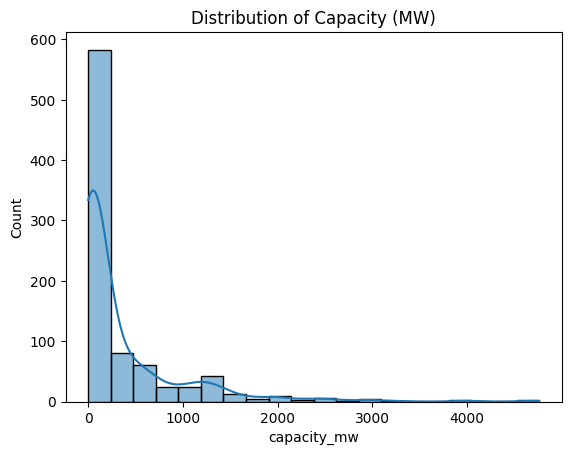

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize the distribution of 'capacity_mw'
sns.histplot(df['capacity_mw'], bins=20, kde=True)
plt.title('Distribution of Capacity (MW)')
plt.show()

univariate analysis

<Axes: xlabel='primary_fuel', ylabel='count'>

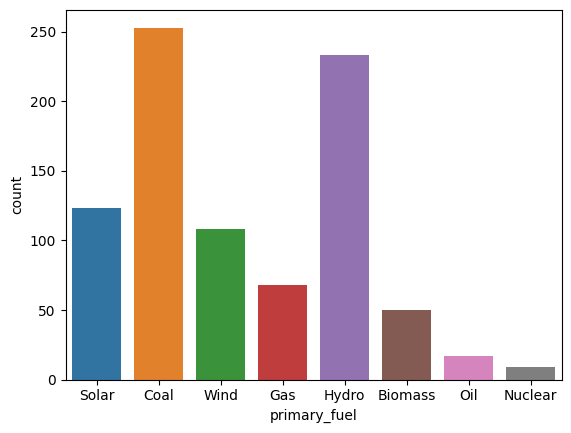

In [36]:
# checking count plot of fuel
sns.countplot(x="primary_fuel", data=df)

<Axes: xlabel='geolocation_source', ylabel='count'>

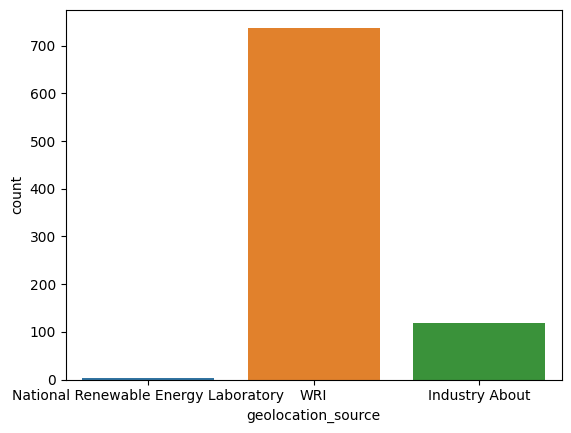

In [37]:
# checking count plot of fuel
sns.countplot(x="geolocation_source", data=df)

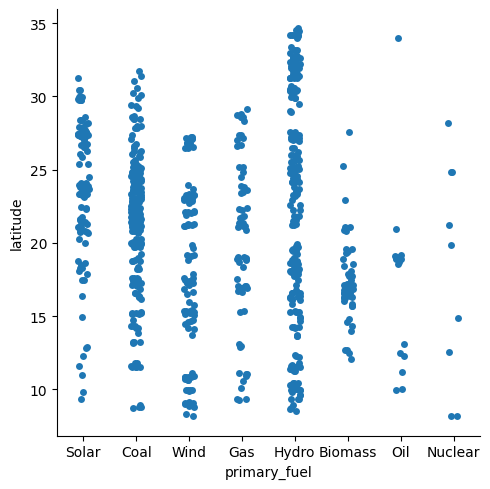

In [38]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

there are no relation in above plot

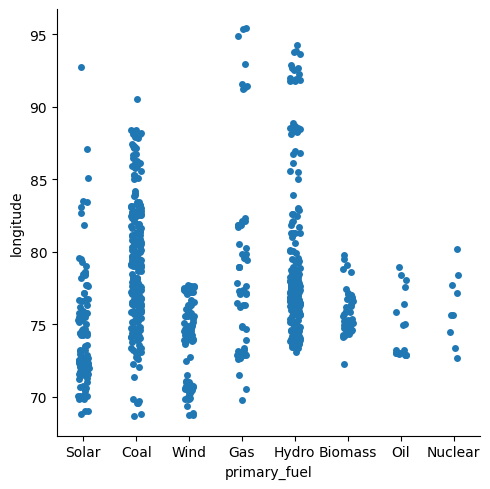

In [39]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

there are no relation in above plot

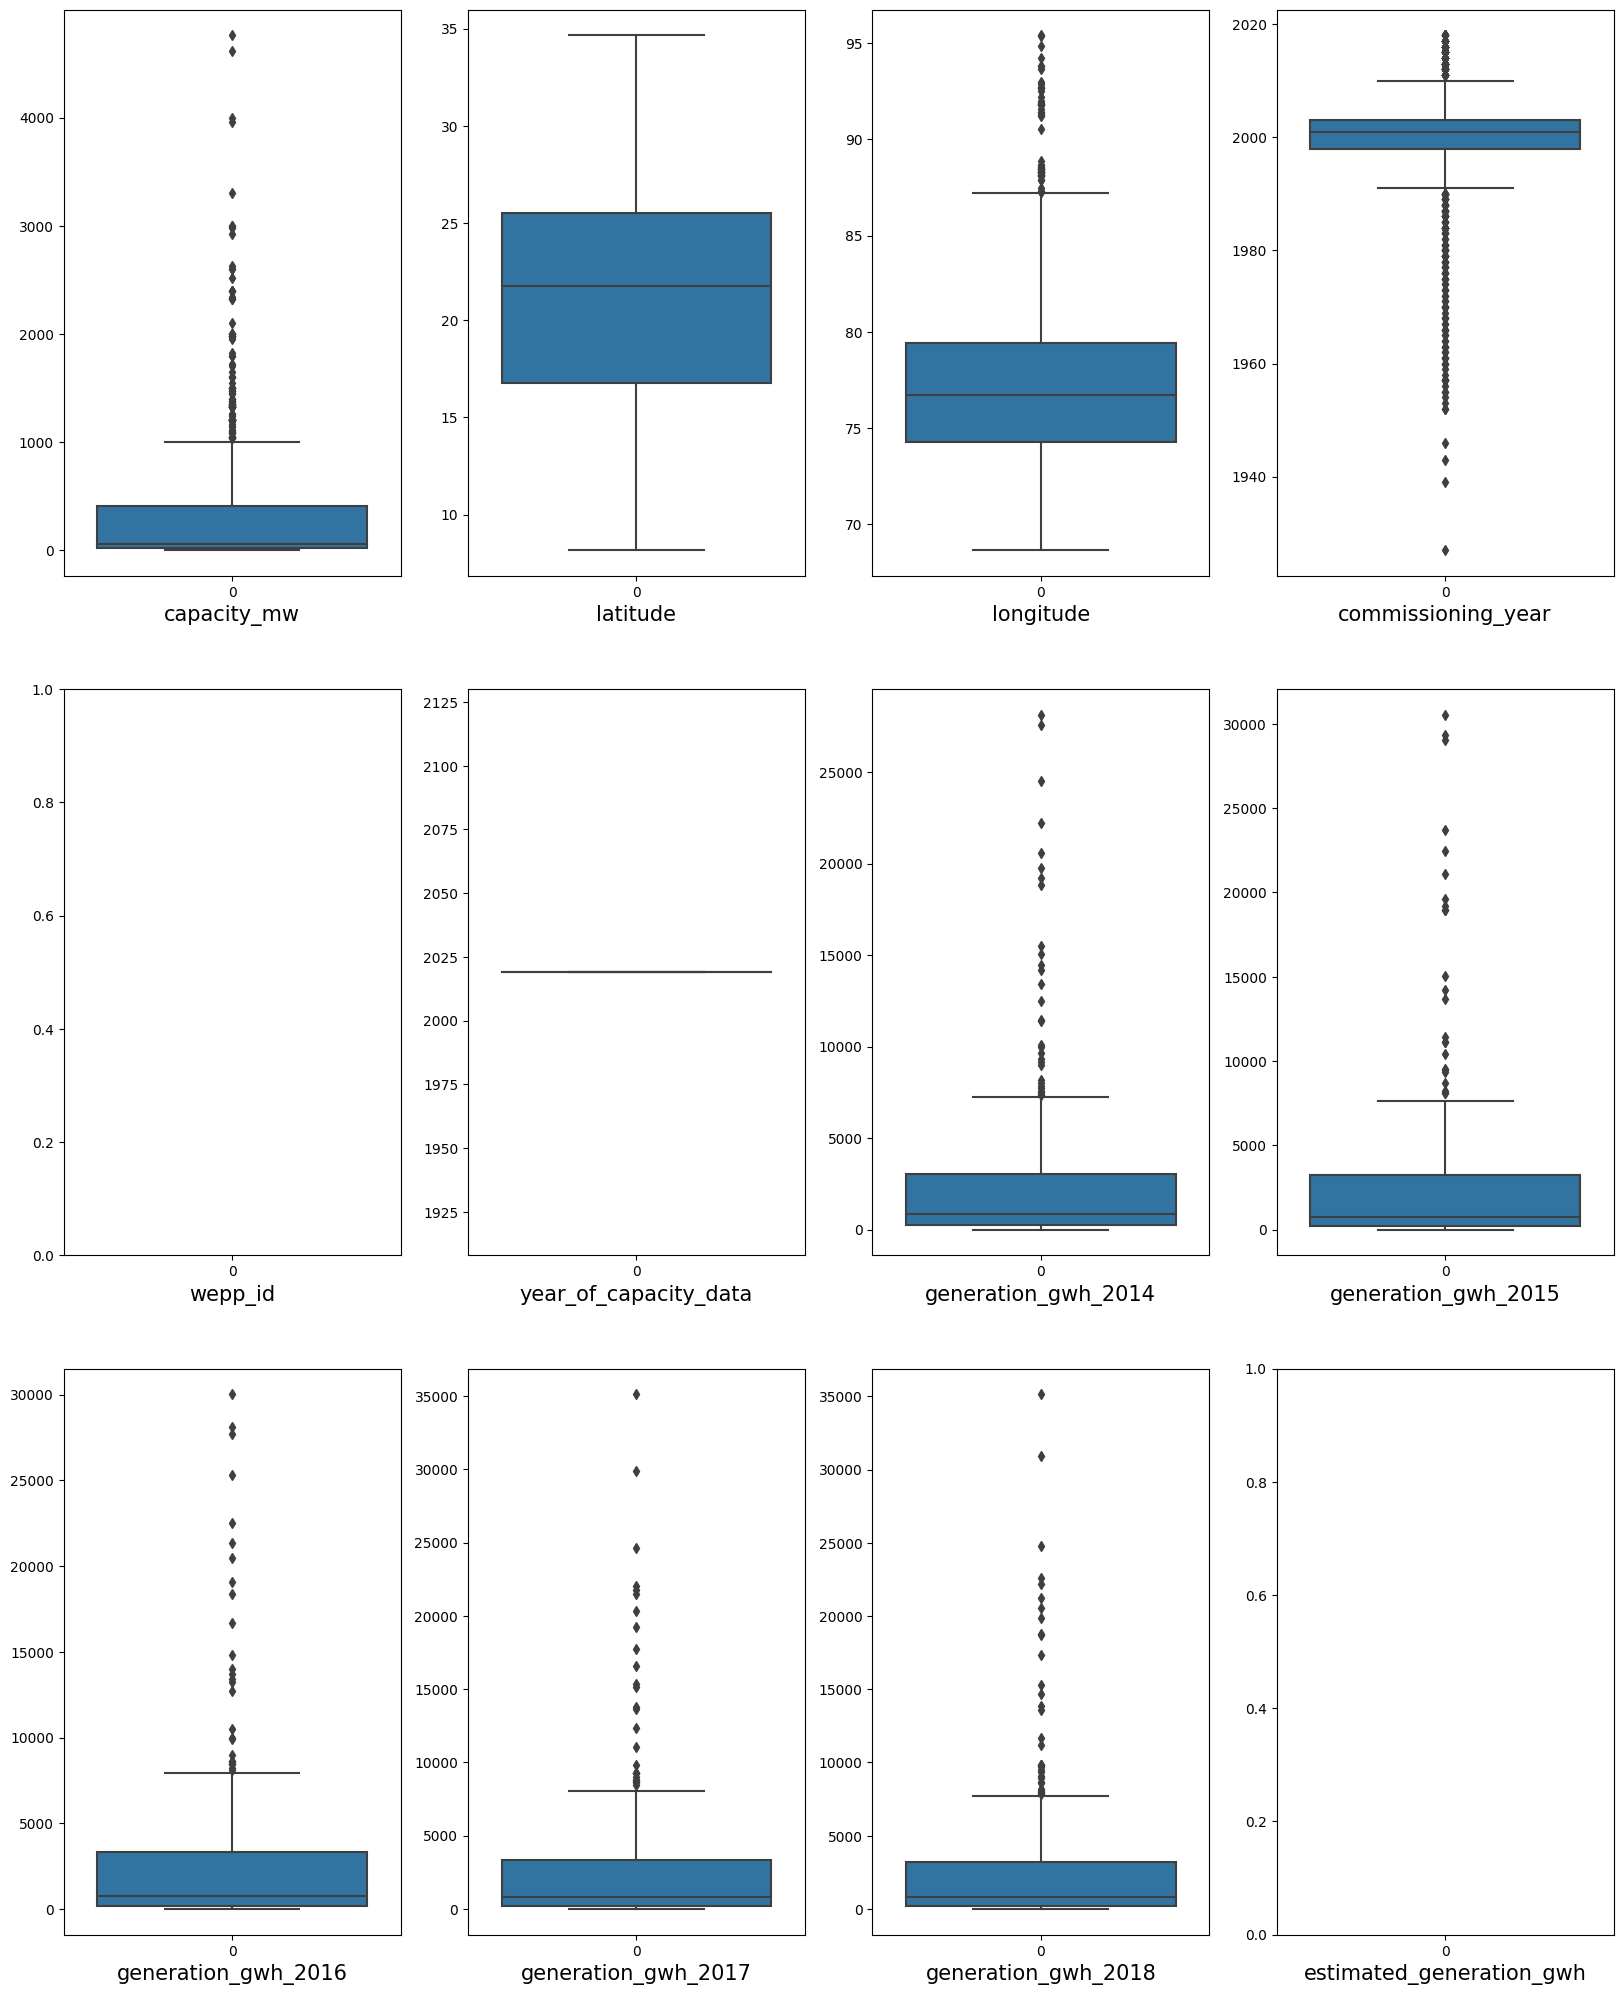

In [40]:
# Identify numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Visualize the outliers using boxplot
plt.figure(figsize=(20, 25))
graph = 1

for column in numeric_columns:
    if graph <= 12:
        plt.subplot(3, 4, graph)
        sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
    graph += 1

plt.show()

# Split the data into training and testing sets

In [41]:
# Split the data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

#Train a model for predicting primary_fuel

In [42]:
# Train a model for predicting 'primary_fuel' (classification)
fuel_model = RandomForestClassifier(random_state=42)
fuel_model.fit(X_train_classification, y_train_classification)
fuel_predictions = fuel_model.predict(X_test_classification)

Evaluate the Model for Predicting Primary Fuel

In [43]:
# Evaluate the classification model
classification_accuracy = accuracy_score(y_test_classification, fuel_predictions)
print(f"Classification Accuracy: {classification_accuracy}")

Classification Accuracy: 0.791907514450867


#Train a model for predicting capacity_mw

In [44]:
# Train a model for predicting 'capacity_mw' (regression)
capacity_model = RandomForestRegressor(random_state=42)
capacity_model.fit(X_train_regression, y_train_regression)
capacity_predictions = capacity_model.predict(X_test_regression)

Evaluate the regression model

In [45]:
# Evaluate the regression model
regression_mse = mean_squared_error(y_test_regression, capacity_predictions)
print(f"Regression Mean Squared Error: {regression_mse}")

Regression Mean Squared Error: 258665.3036069416


# Predict 'primary_fuel' using the trained classification model

In [46]:
# Predict 'primary_fuel' using the trained classification model
fuel_predictions = fuel_model.predict(X_test_classification)
predicted_fuel_df = pd.DataFrame({'Actual_Fuel': y_test_classification, 'Predicted_Fuel': fuel_predictions})
print(predicted_fuel_df)

    Actual_Fuel Predicted_Fuel
751       Solar          Solar
633     Biomass           Wind
126        Wind           Wind
218         Gas            Gas
395        Wind           Wind
..          ...            ...
245       Solar          Solar
347     Biomass        Biomass
225        Wind        Biomass
839       Hydro          Hydro
7         Hydro          Hydro

[173 rows x 2 columns]


# Predict 'capacity_mw' using the trained regression model

In [47]:
# Predict 'capacity_mw' using the trained regression model
capacity_predictions = capacity_model.predict(X_test_regression)
predicted_capacity_df = pd.DataFrame({'Actual_Capacity': y_test_regression, 'Predicted_Capacity': capacity_predictions})
print(predicted_capacity_df)

     Actual_Capacity  Predicted_Capacity
751             5.00             22.1180
633            11.00             34.6870
126           150.00             83.2120
218           648.00            364.7128
395             6.00           1406.3145
..               ...                 ...
245            50.00            140.3950
347            26.00             31.0150
225            23.10             45.3250
839            91.35            247.3380
7             192.00            294.4716

[173 rows x 2 columns]


#Visualize 'primary_fuel' predictions Diagram

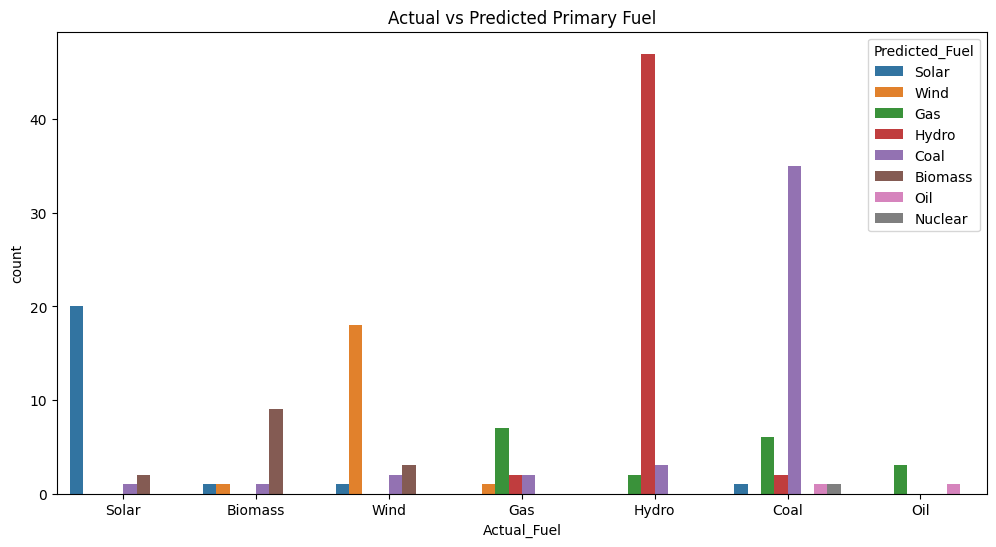

In [48]:


# Visualize 'primary_fuel' predictions
plt.figure(figsize=(12, 6))
sns.countplot(x='Actual_Fuel', hue='Predicted_Fuel', data=predicted_fuel_df)
plt.title('Actual vs Predicted Primary Fuel')
plt.show()

#Visualize 'capacity_mw' predictions Diagram

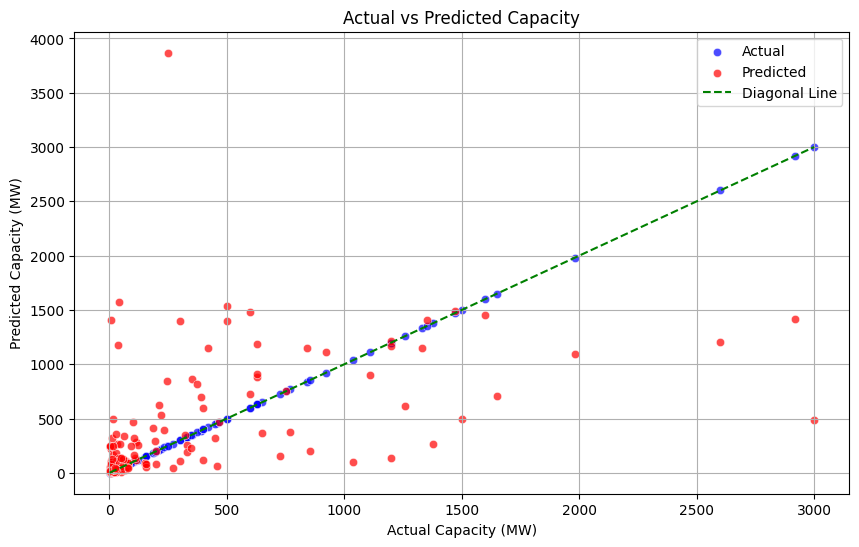

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predicted_capacity_df is the DataFrame containing actual and predicted capacities
plt.figure(figsize=(10, 6))

# Scatter plot for actual capacity (blue)
sns.scatterplot(x='Actual_Capacity', y='Actual_Capacity', data=predicted_capacity_df, color='blue', label='Actual', alpha=0.7)

# Scatter plot for predicted capacity (red)
sns.scatterplot(x='Actual_Capacity', y='Predicted_Capacity', data=predicted_capacity_df, color='red', label='Predicted', alpha=0.7)

# Diagonal line
plt.plot([predicted_capacity_df['Actual_Capacity'].min(), predicted_capacity_df['Actual_Capacity'].max()],
         [predicted_capacity_df['Actual_Capacity'].min(), predicted_capacity_df['Actual_Capacity'].max()],
         linestyle='--', color='green', label='Diagonal Line')

plt.title('Actual vs Predicted Capacity')
plt.xlabel('Actual Capacity (MW)')
plt.ylabel('Predicted Capacity (MW)')
plt.legend()
plt.grid(True)
plt.show()